# Exploratory Data Analysis (EDA) on Fashion-MNIST Dataset

In this notebook, we will perform an exploratory data analysis (EDA) on the **Fashion-MNIST** dataset. The primary goals of this analysis are:

### 1.Data Inspection  
Load the dataset and inspect its structure, including shape, data types, and class labels.
### 2.Data Cleansing  
Check for missing values, duplicates, and any obvious outliers or anomalies.
### 3.Descriptive Statistics  
Calculate and visualize basic statistics (mean, standard deviation, etc.) for the image data and label distribution.
### 4.Data Visualization: Visualize class distributions, sample images
The EDA process will help us understand the dataset better and prepare it for future modeling tasks.

---

##Dataset Information
---
The dataset contains grayscale images (28x28 pixels) of 10 different fashion categories:

T-shirt/top

Trouser

Pullover

Dress

Coat

Sandal

Shirt

Sneaker

Bag

Ankle boot

---

# Structure of the Notebook

This notebook follows a structured approach to perform **Exploratory Data Analysis (EDA)** on the Fashion-MNIST dataset before moving on to modeling tasks.

---

## 1. Importing Necessary Libraries
We will import Python libraries required for data loading, analysis, and visualization.  
Libraries include: **PyTorch, Torchvision, NumPy, Pandas, Matplotlib, and Seaborn**.

---

## 2. Loading the Dataset
We will load the **Fashion-MNIST** dataset using **Torchvision** and apply basic transformations like converting images to tensors and normalization.

---

## 3. Initial Data Inspection
This step involves:
- Checking the dataset structure and dimensions
- Viewing class labels
- Displaying a few sample images to understand the data

---

## 4. Data Cleaning and Transformation
Although Fashion-MNIST is clean, we will check for:
- Missing values
- Duplicates
- Any anomalies
Then, we will prepare data for analysis (e.g., flattening, summarizing).

---

## 5. Descriptive Statistics
Compute key statistics such as:
- Mean and standard deviation of pixel values
- Class distribution
- Basic numeric summaries for brightness and contrast per class

---

## 6. Data Visualization
Create meaningful plots:
- Bar plot for class distribution
- Sample image grid to visualize classes
- Histogram of pixel intensity distribution

---

### Objective
By the end of this EDA, we will have a clear understanding of the Fashion-MNIST dataset, which will help us build and evaluate DCGAN models with regularization techniques.


## 1. Importing Necessary Libraries

In [10]:
# Import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch and torchvision for loading the Fashion-MNIST dataset
import torch
from torchvision import datasets, transforms

# Set seaborn style for plots
sns.set_style('whitegrid')


##2: Loading the Fashion-MNIST Dataset
In this step, we load the Fashion-MNIST dataset using PyTorch's torchvision.datasets.
This dataset contains 70,000 grayscale images (60,000 for training and 10,000 for testing) of clothing items across 10 categories.
Each image is 28×28 pixels.

We'll apply basic transformations to convert the images to tensors and normalize them.
Then, we convert the PyTorch training dataset into a pandas DataFrame so we can perform EDA easily

In [11]:
# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Download the Fashion-MNIST training dataset
train_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)

# Create a DataFrame to inspect images and labels easily
images = train_dataset.data.numpy()
labels = train_dataset.targets.numpy()

# Flatten images for tabular EDA (if needed)
flattened_images = images.reshape(images.shape[0], -1)

# Create a DataFrame with image pixels and labels
df_fashion = pd.DataFrame(flattened_images)
df_fashion['label'] = labels  # Add label as the target column

# Show basic info
print("Fashion-MNIST DataFrame shape:", df_fashion.shape)
df_fashion.head()


Fashion-MNIST DataFrame shape: (60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##3: Initial Data Inspection
In this step, we examine the structure and contents of the Fashion-MNIST dataset.
We will:

- View the shape of the dataset

- Inspect column types

- Check for any missing or duplicate values

- Preview a few sample rows

In [12]:
# Display the number of rows and columns
print(f"Dataset shape: {df_fashion.shape}")

# Display data types of each column
print("\nColumn Data Types:")
print(df_fashion.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df_fashion.isnull().sum().tail())  # Tail since pixel columns are too many

# Check for duplicates
duplicates = df_fashion.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Preview the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
df_fashion.head()


Dataset shape: (60000, 785)

Column Data Types:
0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
         ...  
780      uint8
781      uint8
782      uint8
783      uint8
label    int64
Length: 785, dtype: object

Missing Values:
780      0
781      0
782      0
783      0
label    0
dtype: int64

Number of duplicate rows: 0

First 5 rows of the dataset:


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##4: Data Cleaning and Transformation
In this step, we clean the dataset by removing any duplicate rows and prepare the data for statistical analysis and modeling.
We will also reshape and normalize pixel values so that they are suitable for visualization and training later on.

In [13]:
# Remove duplicate rows if any exist
initial_shape = df_fashion.shape
df_fashion.drop_duplicates(inplace=True)
final_shape = df_fashion.shape
print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")

# Normalize the pixel values to range [0, 1]
pixel_columns = df_fashion.columns[1:]  # all columns except the label
df_fashion[pixel_columns] = df_fashion[pixel_columns] / 255.0

# Verify normalization
print("\nPixel value range after normalization:")
print(f"Min: {df_fashion[pixel_columns].min().min():.4f}")
print(f"Max: {df_fashion[pixel_columns].max().max():.4f}")


Removed 0 duplicate rows.

Pixel value range after normalization:
Min: 0.0000
Max: 1.0000


##5: Descriptive Statistics
In this step, we’ll compute statistical summaries of the dataset to understand the distribution of pixel values and class labels.
This includes measures like mean, standard deviation, and class counts.

In [22]:
# Store pixel values of the entire training set
pixel_values = []
class_stats = {i: [] for i in range(10)}  # Store per-class brightness

for img, label in train_dataset:
    np_img = np.array(img)
    pixel_values.extend(np_img.flatten())
    class_stats[label].append(np_img)

pixel_values = np.array(pixel_values)

# Overall stats
mean_pixel = pixel_values.mean()
std_pixel = pixel_values.std()

print(f"Overall Mean Pixel Intensity: {mean_pixel:.2f}")
print(f"Overall Std Dev of Pixel Intensity: {std_pixel:.2f}")



Overall Mean Pixel Intensity: 0.29
Overall Std Dev of Pixel Intensity: 0.35


##Class-Level Brightness and Contrast

In [23]:
# Brightness (mean) and contrast (std) per class
brightness_per_class = []
contrast_per_class = []

for i in range(10):
    class_images = np.stack(class_stats[i])
    brightness = class_images.mean()
    contrast = class_images.std()

    brightness_per_class.append(brightness)
    contrast_per_class.append(contrast)

# Display in a summary table
summary_df = pd.DataFrame({
    'Label': list(label_map.values()),
    'Mean Brightness': np.round(brightness_per_class, 2),
    'Contrast (Std Dev)': np.round(contrast_per_class, 2)
})

print("Brightness and Contrast Summary Per Class:")
display(summary_df)


Brightness and Contrast Summary Per Class:


,Label,Mean Brightness,Contrast (Std Dev)
0,T-shirt/top,0.33,0.35
1,Trouser,0.22,0.34
2,Pullover,0.38,0.36
3,Dress,0.26,0.35
4,Coat,0.39,0.38
5,Sandal,0.14,0.26
6,Shirt,0.33,0.34
7,Sneaker,0.17,0.29
8,Bag,0.35,0.37
9,Ankle boot,0.30,0.37


###Interpretation:
Many pixels are close to zero intensity, showing the background dominates most of the image.

Items with higher mean brightness and contrast probably appear more prominently (larger size or central placement) in the image.

This understanding helps us anticipate how well generative models might reproduce different clothing categories — darker, low-contrast items may be harder to model.

##6: Data Visualization

In this step, we will visualize the class distribution of Fashion-MNIST to understand how balanced the dataset is. This helps us ensure that the model won’t be biased toward overrepresented categories.

We'll also display a few sample images from each class to get a visual sense of the data.



##Bar Plot of Class Distribution

/tmp/ipython-input-24-3899025624.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label_name', y='count', data=df_fashion, palette='Set3')


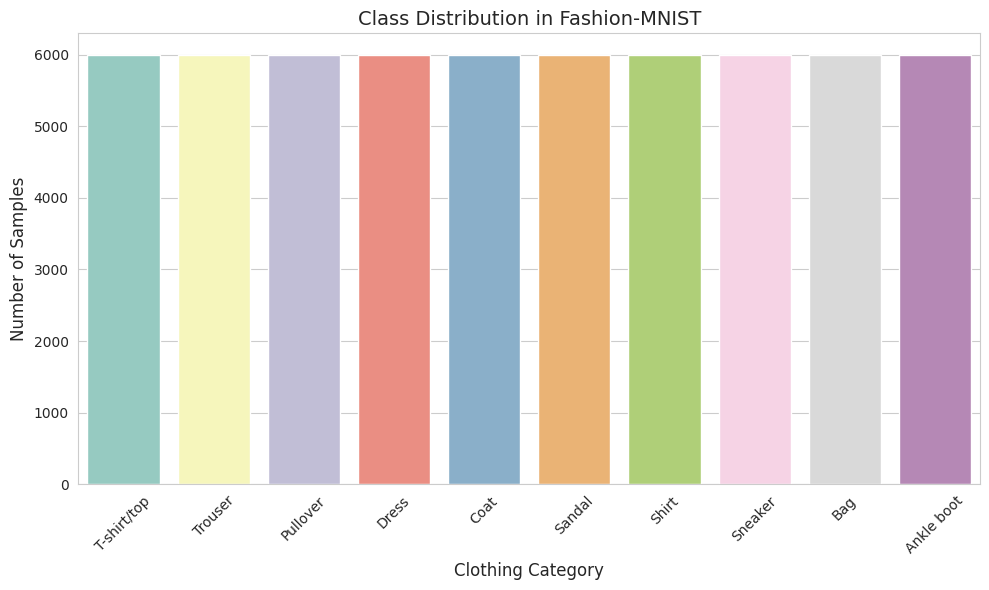

In [24]:
# Get all labels from the training dataset
labels = [label for _, label in train_dataset]
label_counts = pd.Series(labels).value_counts().sort_index()

# Create a DataFrame with label names
df_fashion = pd.DataFrame({
    'label': label_counts.index,
    'count': label_counts.values
})
df_fashion['label_name'] = df_fashion['label'].map(label_map)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='label_name', y='count', data=df_fashion, palette='Set3')
plt.title('Class Distribution in Fashion-MNIST', fontsize=14)
plt.xlabel('Clothing Category', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Interpretation of the Plot:
The bar plot shows the distribution of samples for each class in the training dataset.
Each bar represents one of the 10 fashion categories in the Fashion MNIST dataset (e.g., "T-shirt/top", "Trouser", "Sandal").
The counts for each class are almost equal, indicating that the dataset is balanced. This is beneficial for training machine learning models, as balanced datasets help prevent bias towards certain classes.
###Key Insights:
The dataset contains approximately the same number of samples for each class (around 6,000 samples per class).
The balanced distribution suggests that we do not need to apply any techniques to handle class imbalance before model training.

## Grid of Sample Images (One per Class)

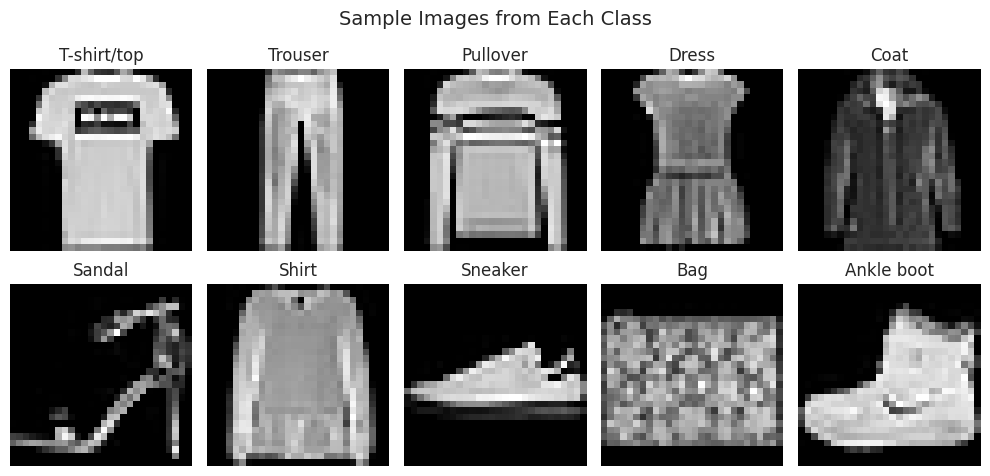

In [26]:
# Plot 1 image per class to visualize categories
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
seen_labels = {}

for img, label in train_dataset:
    if label not in seen_labels:
        axs[label].imshow(img.squeeze(), cmap='gray')
        axs[label].set_title(label_map[label])
        axs[label].axis('off')
        seen_labels[label] = True
    if len(seen_labels) == 10:
        break

plt.suptitle("Sample Images from Each Class", fontsize=14)
plt.tight_layout()
plt.show()


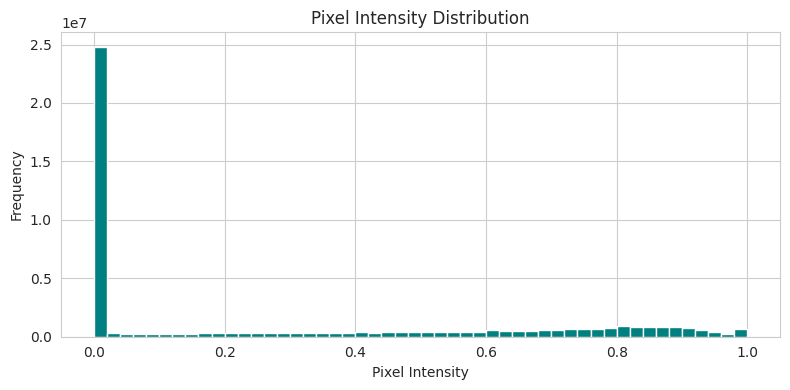

In [31]:
#Histogram of pixel intensities across all images
all_pixels = torch.stack([img for img, _ in train_dataset]).numpy().flatten()

plt.figure(figsize=(8, 4))
plt.hist(all_pixels, bins=50, color='teal')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


###Interpretation:
- The histogram reveals that the majority of pixel values are close to 0, indicating that a large portion of the image background is black or very dark.
- There is a long tail extending towards 1, but the frequency of these higher intensity pixels is much lower, suggesting that brighter pixels are less common.
- This type of distribution is expected for fashion images where the background is typically dark, and only the clothing items have varying intensity values.
- Understanding this distribution helps verify the preprocessing steps (e.g., normalization) and provides insights into the dataset's characteristics before model training.